In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
my_data=pd.read_csv("Admission_Predict.csv")
my_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
my_data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
my_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:>

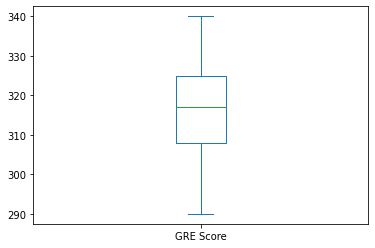

In [6]:
my_data["GRE Score"].plot.box()

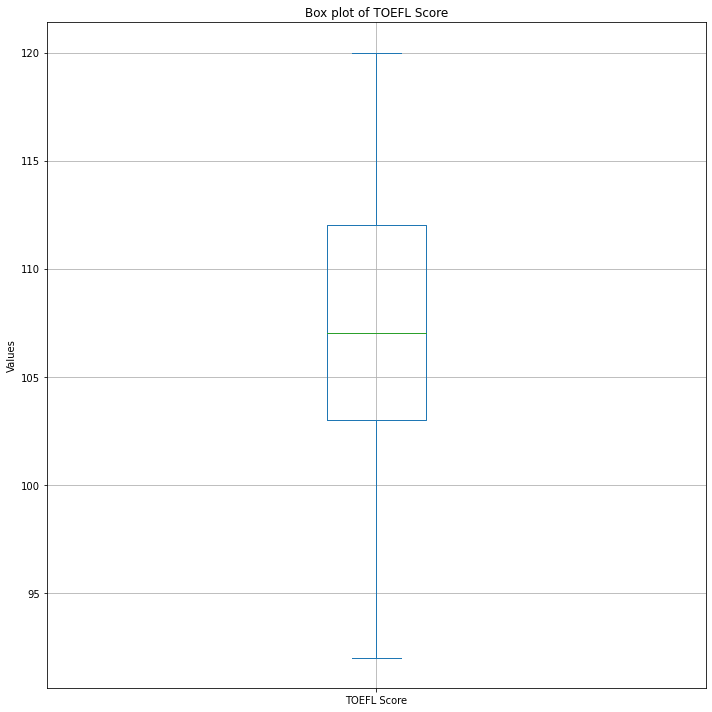

In [7]:
plt.figure(figsize=(10,10))
my_data["TOEFL Score"].plot(kind="box")
plt.title(f"Box plot of TOEFL Score")
#plt.xlabel(col)
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()

In [8]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
def box_plot(col):
    plt.figure()
    my_data[col].plot(kind="box")
    plt.title(f"Box plot of{col}")
    #plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

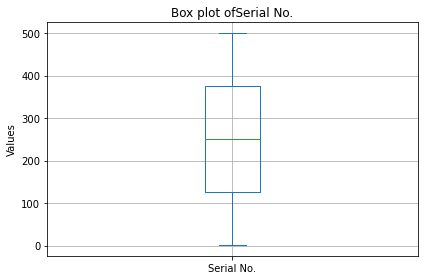

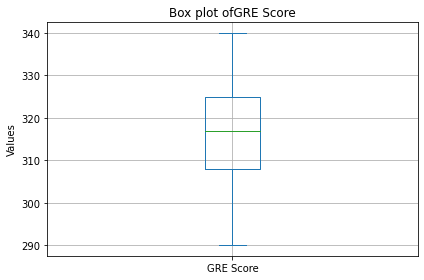

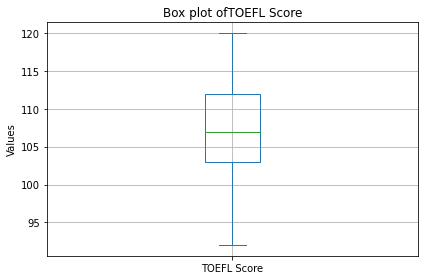

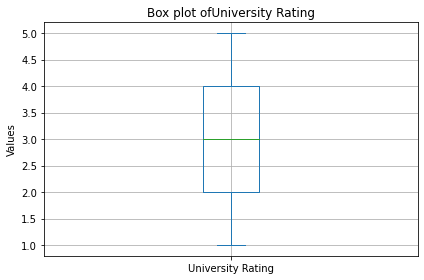

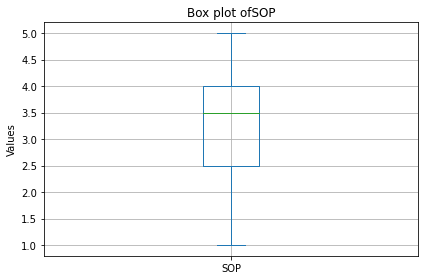

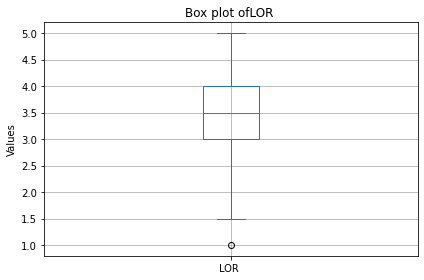

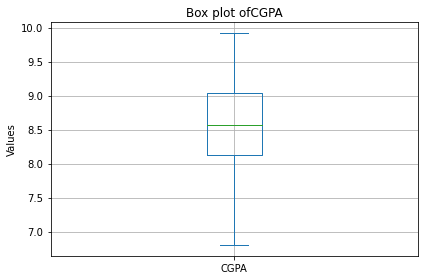

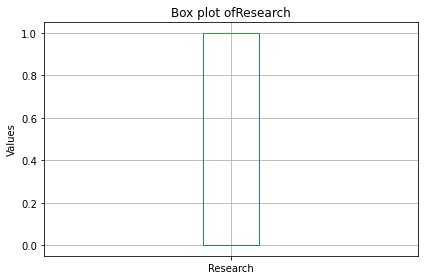

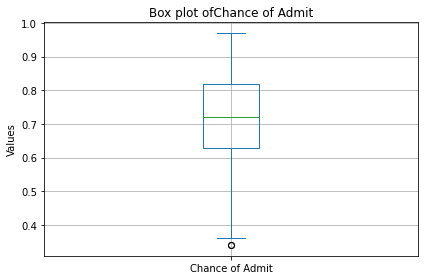

In [10]:
for col in my_data.columns:
    box_plot(col)

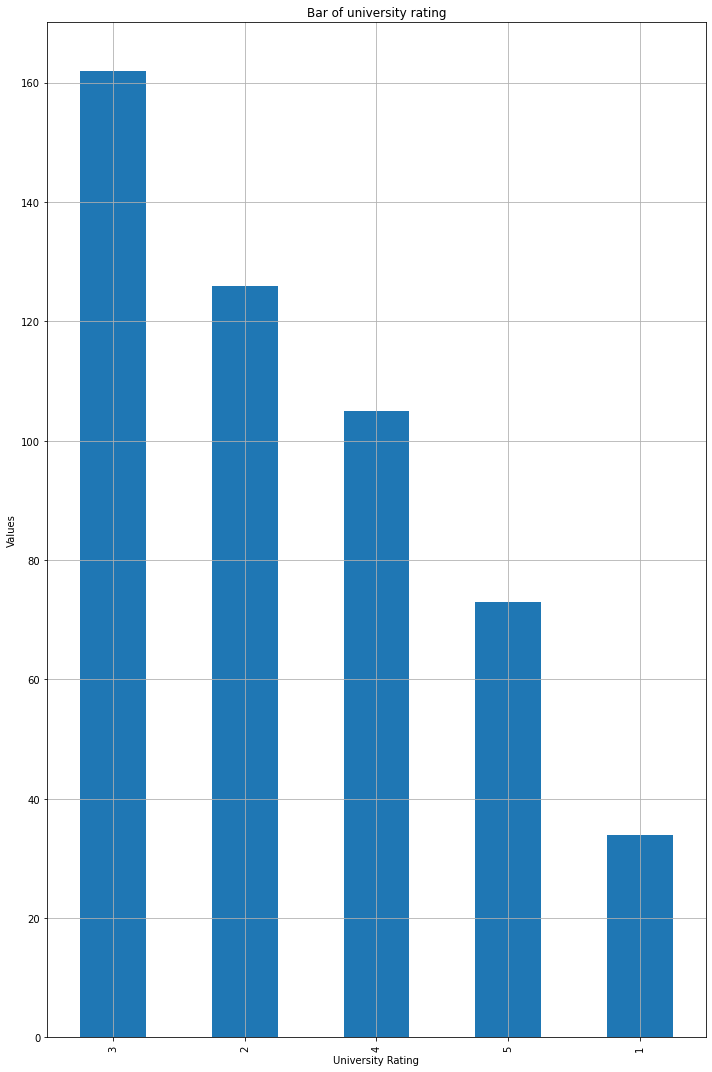

In [11]:
plt.figure(figsize=(10,15))
my_data["University Rating"].value_counts().plot(kind="bar")
plt.title(f"Bar of university rating")
plt.xlabel("University Rating")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()

In [12]:
def bar_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="bar")
    plt.title(f"Bar Plot of {col}")
    plt.xticks(fontsize=10)
    #plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

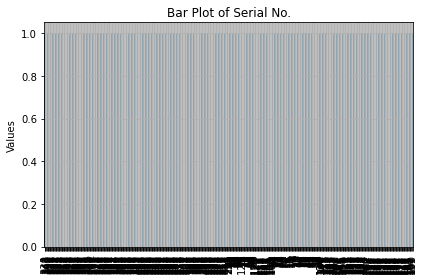

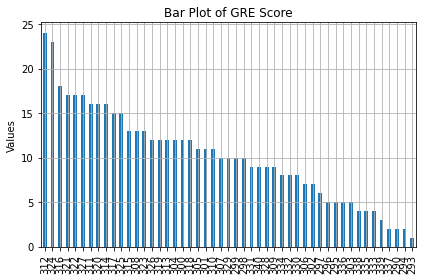

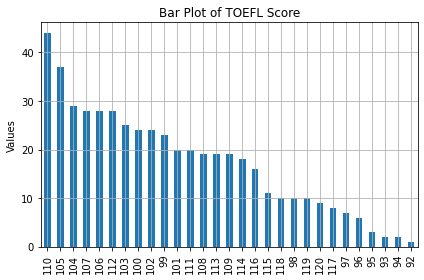

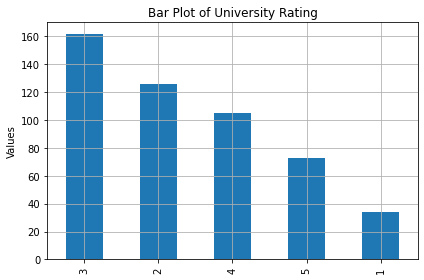

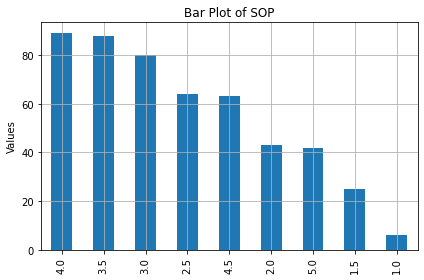

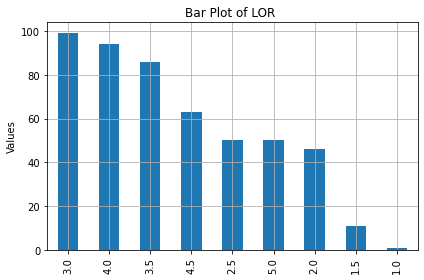

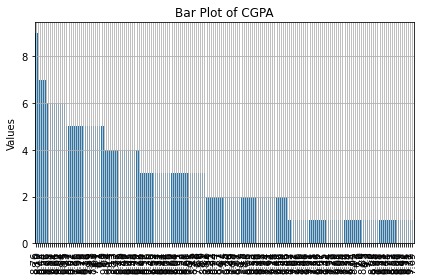

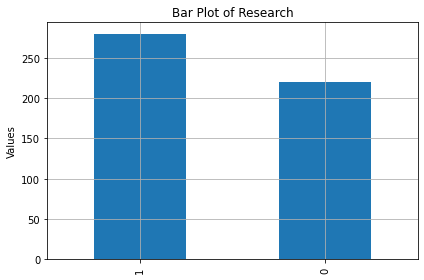

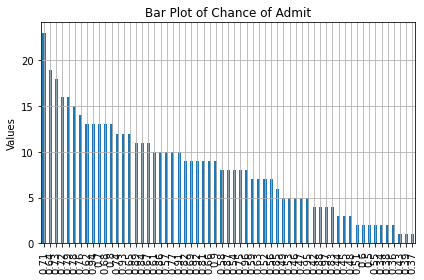

In [13]:
for col in my_data.columns:
    bar_plot(col)

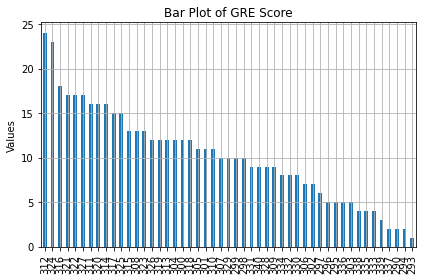

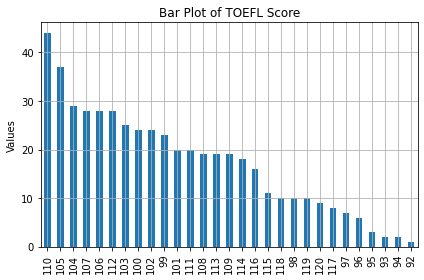

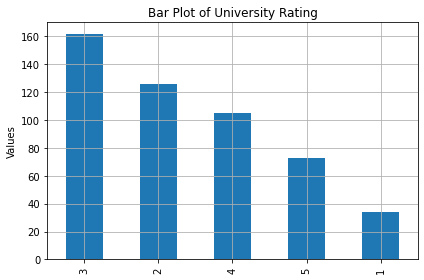

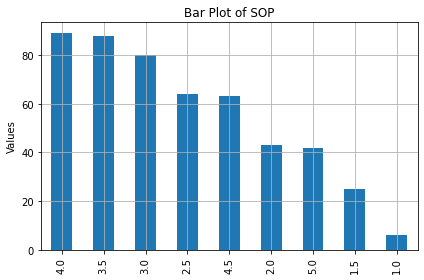

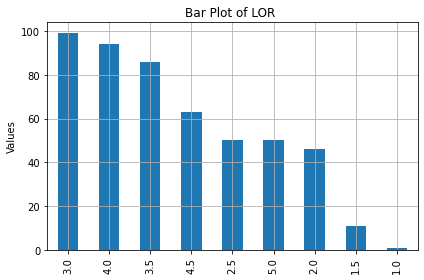

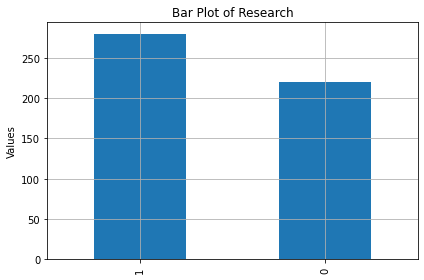

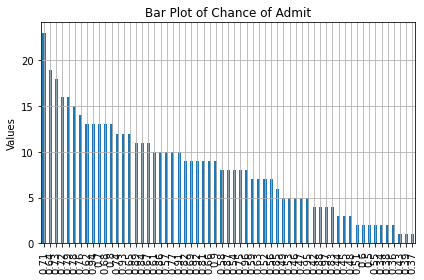

In [14]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit']:
    bar_plot(col)

In [15]:
def line_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="line")
    plt.title(f"Line Plot of {col}")
    plt.xticks(fontsize=10)
    #plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

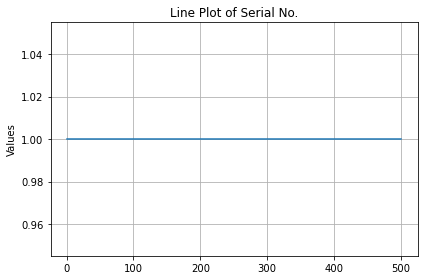

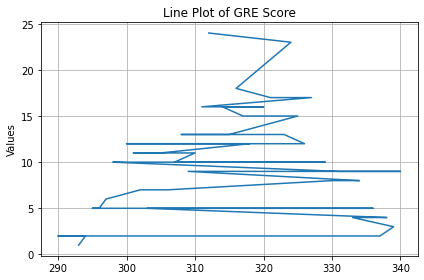

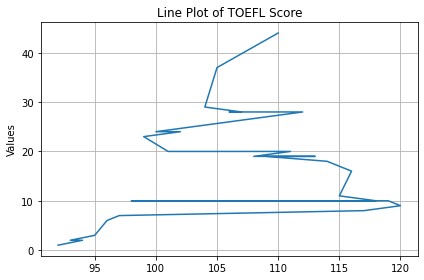

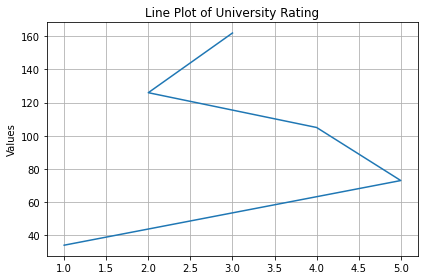

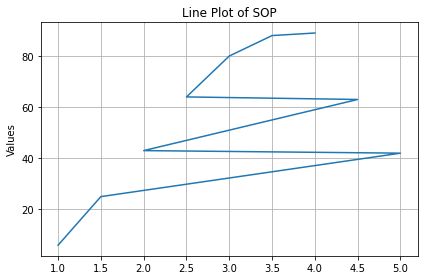

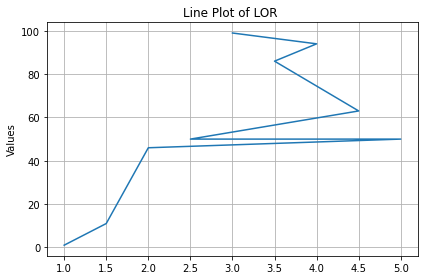

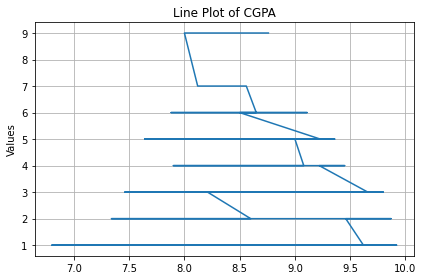

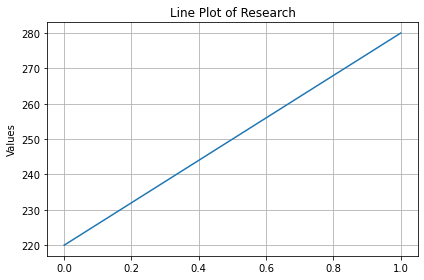

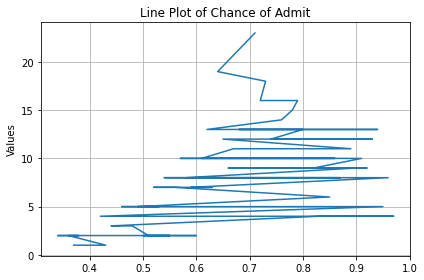

In [16]:
for col in my_data.columns:
    line_plot(col)

In [17]:
y=my_data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [18]:
x=my_data.drop(["Chance of Admit","Serial No."],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x testing {x_test.shape}")
print(f"y testing {y_test.shape}")

x training (400, 7)
y training (400,)
x testing (100, 7)
y testing (100,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [23]:
# train model
model_lr.fit(x_train,y_train)

LinearRegression()

In [24]:
model_lr.predict(x_test)

array([0.80768917, 0.93479876, 0.5303792 , 0.62362643, 0.81791424,
       0.70034296, 0.87583228, 0.77662275, 0.62056647, 0.88393921,
       0.9027832 , 0.76428744, 0.95259195, 0.58724159, 0.68995512,
       0.83581225, 0.51867472, 0.76866776, 0.93862206, 0.6202087 ,
       0.57358604, 0.74972548, 0.85217459, 0.69107668, 0.83084183,
       0.65173662, 0.57996267, 0.6273949 , 0.97410552, 0.88120033,
       0.5342063 , 0.71343667, 0.65787029, 0.64879015, 0.472998  ,
       0.8509634 , 0.85517134, 0.7822117 , 0.94054506, 0.61315557,
       0.63515053, 0.72028865, 0.66261675, 0.90800971, 0.80597558,
       0.71942117, 0.64793978, 0.67700151, 0.96328152, 0.84611555,
       0.75576732, 0.56102372, 0.6415725 , 0.6911277 , 0.55450882,
       0.54644557, 0.68733316, 0.50859564, 0.59158872, 0.68785759,
       0.88242591, 0.84427743, 0.78396072, 0.53678269, 0.62254147,
       0.90615599, 0.88603944, 0.8442567 , 0.83423306, 0.88785258,
       0.6368253 , 0.7581147 , 0.6264739 , 0.83601431, 0.55723

In [25]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.80768917, 0.93479876, 0.5303792 , 0.62362643, 0.81791424,
       0.70034296, 0.87583228, 0.77662275, 0.62056647, 0.88393921,
       0.9027832 , 0.76428744, 0.95259195, 0.58724159, 0.68995512,
       0.83581225, 0.51867472, 0.76866776, 0.93862206, 0.6202087 ,
       0.57358604, 0.74972548, 0.85217459, 0.69107668, 0.83084183,
       0.65173662, 0.57996267, 0.6273949 , 0.97410552, 0.88120033,
       0.5342063 , 0.71343667, 0.65787029, 0.64879015, 0.472998  ,
       0.8509634 , 0.85517134, 0.7822117 , 0.94054506, 0.61315557,
       0.63515053, 0.72028865, 0.66261675, 0.90800971, 0.80597558,
       0.71942117, 0.64793978, 0.67700151, 0.96328152, 0.84611555,
       0.75576732, 0.56102372, 0.6415725 , 0.6911277 , 0.55450882,
       0.54644557, 0.68733316, 0.50859564, 0.59158872, 0.68785759,
       0.88242591, 0.84427743, 0.78396072, 0.53678269, 0.62254147,
       0.90615599, 0.88603944, 0.8442567 , 0.83423306, 0.88785258,
       0.6368253 , 0.7581147 , 0.6264739 , 0.83601431, 0.55723

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
mse=mean_squared_error(y_test,y_pred)
print(f"mean squared error is {mse}")
rmse=sqrt(mse)
print(f"Root mean squared error is {rmse}")

mean squared error is 0.004339361062472935
Root mean squared error is 0.06587382683944311


In [28]:
model_lr.predict([[4,5,67,2,1,9,3]])

array([-0.04429012])

In [29]:
x_test.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [30]:
from sklearn.metrics import r2_score

In [31]:
r_squared=r2_score(y_test,y_pred)
print(f"squared  is {r_squared}")

squared  is 0.7787822431585506


In [32]:
print(f"constant value is{model_lr.intercept_}")

constant value is-1.409339304391708


In [33]:
print(f"slope m1, m2 and m3{model_lr.coef_}")

slope m1, m2 and m3[0.00224437 0.00310131 0.00280223 0.00032962 0.01482761 0.1181061
 0.02479131]


In [34]:
import pickle 
pickle.dump(model_lr,open("mymodel.pkl","wb"))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [38]:
select_models=[LinearRegression(),
               DecisionTreeRegressor(max_depth= None,min_samples_leaf= 2,min_samples_split=5),
               RandomForestRegressor(max_depth= None,min_samples_leaf= 2,min_samples_split=5,n_estimators=100)]

In [39]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("---------------")
    print(f"List of R Sqaure {my_r_square}")
    adj_r_square_test=1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r_squared_test")
    adj_r2_square_value.append(adj_r_square_test)
    print(f"adjusted R square {adj_r2_square_value} of model {model}")
    print("---------------")
    print(f"adjusted R square {adj_r2_square_value}")

RMSE value [0.06587382683944311] and R Squared value [0.7328372295589607] of model LinearRegression()
List of Rmse [0.06587382683944311]
---------------
List of R Sqaure [0.7328372295589607]
LinearRegression(),adj_r_squared_test
adjusted R square [0.7125096274601859] of model LinearRegression()
---------------
adjusted R square [0.7125096274601859]
RMSE value [0.06587382683944311, 0.07744487286666131] and R Squared value [0.7328372295589607, 0.6649619697485025] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06587382683944311, 0.07744487286666131]
---------------
List of R Sqaure [0.7328372295589607, 0.6649619697485025]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r_squared_test
adjusted R square [0.7125096274601859, 0.6394699457076278] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
---------------
adjusted R square [0.7125096274601859, 0.6394699457076278]
RMSE value [0.06587382683944311, 0.077444872

In [40]:
result=[my_rmse, my_r_square,adj_r2_square_value]
result

[[0.06587382683944311, 0.07744487286666131, 0.06699234249098103],
 [0.7328372295589607, 0.6649619697485025, 0.7431367358017869],
 [0.7125096274601859, 0.6394699457076278, 0.7235927917867054]]

In [41]:
a=pd.DataFrame(data=result,columns=["LinearRegression","DecisionTreeRegressor","RandomForestRegressor"], index=["rmse","R Square","adjusted R square"])

Text(0, 0.5, 'values')

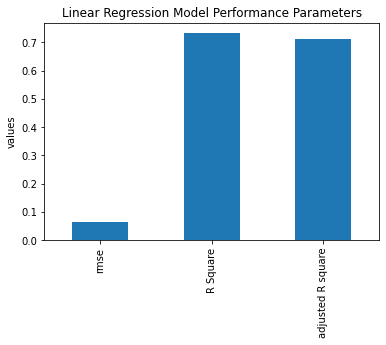

In [42]:
a.LinearRegression.plot(kind="bar")
plt.title("Linear Regression Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

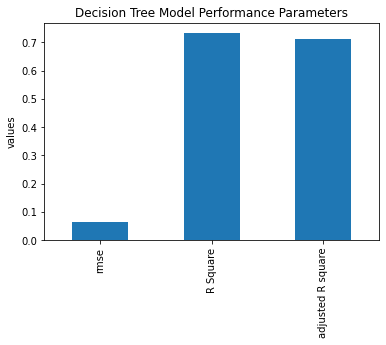

In [43]:
a.LinearRegression.plot(kind="bar")
plt.title("Decision Tree Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

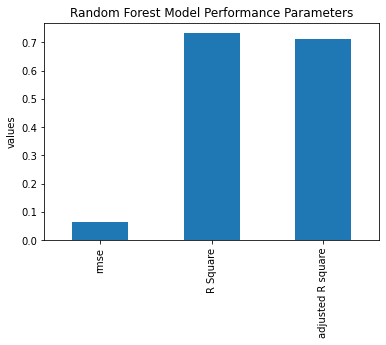

In [44]:
a.LinearRegression.plot(kind="bar")
plt.title("Random Forest Model Performance Parameters")
plt.ylabel("values")

In [45]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Model performance Graph {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

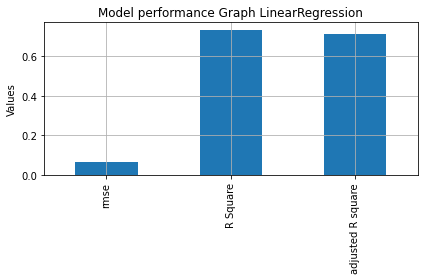

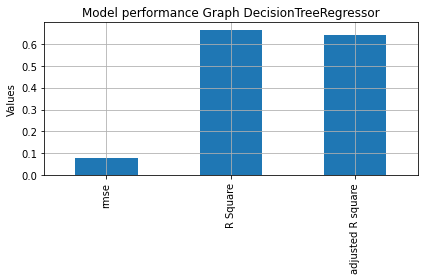

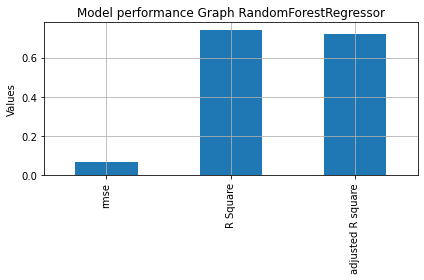

In [46]:
for col in a.columns:
    my_model_plot(col)